# Step 1: study the data

In [1]:
import pandas as pd
from scipy import stats as st
import numpy as np
import matplotlib.pyplot as plt

In [2]:
calls = pd.read_csv('/datasets/megaline_calls.csv')
inet = pd.read_csv('/datasets/megaline_internet.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')
users = pd.read_csv('/datasets/megaline_users.csv')

First let's look at each dataset

#####  Calls

In [3]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [4]:
calls.duration.head(10)

0     8.52
1    13.66
2    14.48
3     5.76
4     4.22
5     2.20
6     5.75
7    14.18
8     5.77
9     4.40
Name: duration, dtype: float64

All the float values should be rounded up and converted to integer type. Let's see if we have negative values or values smaller then 1, because 1 minute is the minimal duration of the call that can be charged. If we have any let's check the length of the corresponsing dataset.

In [5]:
calls[calls.duration < 1]

,id,user_id,call_date,duration
19,1001_4,1001,2018-12-05,0.00
25,1001_13,1001,2018-12-24,0.00
28,1001_23,1001,2018-10-27,0.98
31,1001_30,1001,2018-10-17,0.00
32,1001_31,1001,2018-11-03,0.00
...,...,...,...,...
137720,1499_189,1499,2018-12-27,0.00
137722,1499_191,1499,2018-12-24,0.00
137725,1499_194,1499,2018-10-31,0.00
137727,1499_196,1499,2018-11-22,0.27


Let's chack how many zeroes we have

In [6]:
len(calls[calls.duration == 0])

26834

We have 26834 values that are equal to zero. If our colleagues who gave us the dataset are certain that this is the correct dataset, we'll replace the zeroes with ones. Unless, we think that those are missed calls.

In [7]:
calls.call_date.head()

0    2018-12-27
1    2018-12-27
2    2018-12-27
3    2018-12-28
4    2018-12-30
Name: call_date, dtype: object

The call_date is readable, but we'll change it's type from object to DateTime

In [8]:
calls.duplicated().sum()

0

In [9]:
calls.isna().sum()

id           0
user_id      0
call_date    0
duration     0
dtype: int64

Seems like we have no apparent duplicates and missing values.


Overall:
- We should round up the duration to the closest higher integer, and change it's datatype from float to int
- Replace 0's in duration by 1's (if not missed calls)
- Change call_date type from object to DateTime

###### Internet  

In [10]:
inet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [11]:
inet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


Three things to note here. First, plans put internet limit in gigabytes, but in our dataset the amount spent is showed in megabytes, so we might want to use a ratio to convert one into another. Second, in the second row we have mb_used = 0. As in the case with the calls, if the dataset is correct, we'll replace the 0's with 1's. We'll also round the mb_used to the nearest next interger. Third, session_date in has an 'object' type so we'll change it to DateTime type.

Let's check how many rows have mb_used==0

In [12]:
len(inet.query('mb_used==0'))

13747

Let's check the column for NaN's and duplicates

In [13]:
inet.duplicated().sum()

0

In [14]:
inet.isna().sum()

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

Looks like we have no apparent NaN's and duplicates

Overall:
- consider difference in megabytes and gigabytes
- round up mb_used and transform it's type from float to int
- replace 0's with 1's 
- change the type of session_date from object to DateType


###### Messages 

In [15]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [16]:
messages.isna().sum()

id              0
user_id         0
message_date    0
dtype: int64

In [17]:
messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [18]:
messages.duplicated().sum()

0

Overall:
- Change the type of the message_date from object to DateTime

###### Plans

In [19]:
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [20]:
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


- There's not much to do here, but we can note again that the plan for month is expressed in mb, but the price for extra is usd_per_gb. So we moght keep in mind the difference between mb and gb

###### Users 

In [21]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   tariff      500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [22]:
users.head()

,user_id,first_name,last_name,age,city,reg_date,tariff,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


For the sake of easier understanding, we could rename tariff column into plans, since we already analyzed plans 

In [23]:
users = users.rename(columns={'tariff':'plan_name'})

In [24]:
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan_name,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [25]:
users.duplicated().sum()

0

In [26]:
users.isna().sum()

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan_name       0
churn_date    466
dtype: int64

So there are no apparent duplicates or missing values. Missing values in churn_date indicate that out of 500 Megaline clients, 466 are still using their plans

Overall:
- transform the type of reg_date from object to DateTime
- transform the type of the non-absent churn_date values to DateTime

<div class="alert alert-success" role="alert">
Very detailed initial analysis and correct conclusions. I like that! =)
</div>

# Step 2. Prepare the data

###### Calls

Goals:
-  round up the duration to the closest higher integer, and change it's datatype from float to int
-   Replace 0's in duration by 1's (if not missed calls)
-    Change call_date type from object to DateTime


In [27]:
calls['duration'] = np.ceil(calls['duration'])


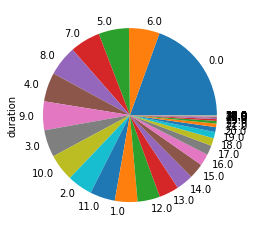

In [28]:
calls['duration'].value_counts().plot(kind='pie')

Looks like 0 minutes area is larger than any other area. It's plausible that people miss some calls, but assuming that they call back such distribution is not expected. So let's replace 0's with 1's in calls durations

<div class="alert alert-success" role="alert">
It's really cool that you decided to illustrate the data with graph. Although, to my taste pie chart is a rather weird choice. Histogram would probably make more sense here, but allright, I'm not complaining :D
</div>

In [29]:
calls.loc[calls['duration']==0,'duration'] = np.floor(calls['duration']+1) 

<div class="alert alert-success" role="alert">
Also, perfectly correct solution to 0.00 min calls!
</div>

In [30]:
len(calls[calls['duration']==0])

0

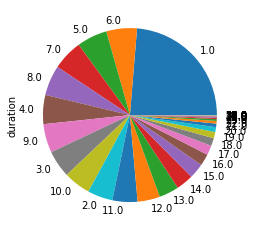

In [31]:
calls['duration'].value_counts().plot(kind='pie')

In [32]:
calls['duration'] = calls['duration'].astype('int64')

In [33]:
calls['call_date'] = pd.to_datetime(calls['call_date'])

###### Internet 

Goals:
- round up mb_used and transform it's type from float to int
- replace 0's with 1's
- change the type of session_date from object to DateType

In [34]:
inet['mb_used']=np.ceil(inet['mb_used'])

In [35]:
len(inet[inet['mb_used']==0])/len(inet['mb_used'])

0.1311423801574052

13.11% of the users have 0  megabytes of the traffic used. It's hard to imagine that nowadays people use no internet, so let's round up these values to 1 mb.  

In [36]:
inet.loc[inet['mb_used']==0,'mb_used'] = np.floor(inet['mb_used']+1) 

<div class="alert alert-success" role="alert">
And again, absolutely correct!
</div>

In [37]:
len(inet[inet['mb_used']==0])

0

In [38]:
inet['mb_used'] = inet['mb_used'].astype('int64')

In [39]:
inet['session_date'] = pd.to_datetime(inet['session_date'])

In [40]:
inet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.2+ MB


###### Messages

Goals:
- Change the type of the message_date from object to DateTime

In [41]:
messages['message_date'] = pd.to_datetime(messages['message_date'])

In [42]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


###### Users 

Goals:
- transform the type of reg_date from object to DateTime
-  transform the type of the non-absent churn_date values to DateTime


In [43]:
def change_type(data, col):
    for c in col:
        data[col] = pd.to_datetime(data[col])

In [44]:
change_type(users, 'reg_date')
change_type(users, 'churn_date')

In [45]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan_name   500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


###### Extracting the data for analysis 

- The number of calls made and minutes used per month

In [46]:
#create a separate month column to include into pivot table
calls['month'] = pd.DatetimeIndex(calls['call_date']).month

In [47]:
calls_per_month = calls.pivot_table(index=['user_id','month'], values = 'duration', aggfunc=['sum','count'])
pd.DataFrame(calls_per_month.to_records())

,user_id,month,"('sum', 'duration')","('count', 'duration')"
0,1000,12,124,16
1,1001,8,187,27
2,1001,9,326,49
3,1001,10,411,65
4,1001,11,441,64
...,...,...,...,...
2253,1498,12,346,39
2254,1499,9,352,41
2255,1499,10,397,53
2256,1499,11,314,45


- The number of text messages sent per month

In [48]:
#create a separate month column to include into pivot table

messages['month'] = pd.DatetimeIndex(messages['message_date']).month

In [49]:
messages.columns

Index(['id', 'user_id', 'message_date', 'month'], dtype='object')

In [50]:
messages_per_month = messages.pivot_table(index=['user_id','month'], values = 'id', aggfunc = 'count')
pd.DataFrame(messages_per_month.to_records())

,user_id,month,id
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


- The volume of data per month

In [51]:
#create a separate month column to include into pivot table
inet['month'] = pd.DatetimeIndex(inet['session_date']).month

In [52]:
inet.columns

Index(['id', 'user_id', 'session_date', 'mb_used', 'month'], dtype='object')

In [53]:
inet_per_month = inet.pivot_table(index=['user_id','month'], values='mb_used', aggfunc='sum')
pd.DataFrame(inet_per_month.to_records())

,user_id,month,mb_used
0,1000,12,1904
1,1001,8,6933
2,1001,9,13346
3,1001,10,22364
4,1001,11,18527
...,...,...,...
2272,1498,12,23170
2273,1499,9,13012
2274,1499,10,19526
2275,1499,11,16841


- The monthly profit from each user

Let's combine the results we got earlier into one dataframe. That way we'll have the data for each user readily available

In [54]:
res = pd.DataFrame()
blank  = pd.DataFrame(inet_per_month.to_records())

In [55]:
res['user_id'] = blank['user_id']
res['month']= blank['month']
res['mb_used'] = blank['mb_used']

res = res.merge(users, on=['user_id'])
res = res.merge(pd.DataFrame(calls_per_month.to_records()), on=['month','user_id'])
res = res.merge(plans, on=['plan_name'])
res = res.merge(pd.DataFrame(messages_per_month.to_records()), on=['month','user_id'])

In [56]:
pd.DataFrame(messages_per_month.to_records())

,user_id,month,id
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [57]:
res.head()

,user_id,month,mb_used,first_name,last_name,age,city,reg_date,plan_name,churn_date,"('sum', 'duration')","('count', 'duration')",messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,id
0,1000,12,1904,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,124,16,1000,30720,3000,70,7,0.01,0.01,11
1,1006,11,2072,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,10,2,1000,30720,3000,70,7,0.01,0.01,15
2,1006,12,32147,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,61,9,1000,30720,3000,70,7,0.01,0.01,139
3,1008,10,17140,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaT,493,71,1000,30720,3000,70,7,0.01,0.01,21
4,1008,11,23723,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaT,459,63,1000,30720,3000,70,7,0.01,0.01,37


<div class="alert alert-success" role="alert">
Seems like the datasets were merged correctly, nice job! =)
</div>

In [58]:
res.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1759 entries, 0 to 1758
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                1759 non-null   int64         
 1   month                  1759 non-null   int64         
 2   mb_used                1759 non-null   int64         
 3   first_name             1759 non-null   object        
 4   last_name              1759 non-null   object        
 5   age                    1759 non-null   int64         
 6   city                   1759 non-null   object        
 7   reg_date               1759 non-null   datetime64[ns]
 8   plan_name              1759 non-null   object        
 9   churn_date             118 non-null    datetime64[ns]
 10  ('sum', 'duration')    1759 non-null   int64         
 11  ('count', 'duration')  1759 non-null   int64         
 12  messages_included      1759 non-null   int64         
 13  mb_

In [59]:
res = res.rename(columns={ "('sum', 'duration')" : 'minutes_n'})
res = res.rename(columns={ "('count', 'duration')" : 'calls_n'})
res = res.rename(columns={'id':'messages'})

In [60]:
res.head()

,user_id,month,mb_used,first_name,last_name,age,city,reg_date,plan_name,churn_date,minutes_n,calls_n,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,messages
0,1000,12,1904,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,124,16,1000,30720,3000,70,7,0.01,0.01,11
1,1006,11,2072,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,10,2,1000,30720,3000,70,7,0.01,0.01,15
2,1006,12,32147,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,61,9,1000,30720,3000,70,7,0.01,0.01,139
3,1008,10,17140,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaT,493,71,1000,30720,3000,70,7,0.01,0.01,21
4,1008,11,23723,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaT,459,63,1000,30720,3000,70,7,0.01,0.01,37


In [61]:
res.columns

Index(['user_id', 'month', 'mb_used', 'first_name', 'last_name', 'age', 'city',
       'reg_date', 'plan_name', 'churn_date', 'minutes_n', 'calls_n',
       'messages_included', 'mb_per_month_included', 'minutes_included',
       'usd_monthly_pay', 'usd_per_gb', 'usd_per_message', 'usd_per_minute',
       'messages'],
      dtype='object')

In [62]:
res['mb_used']

0        1904
1        2072
2       32147
3       17140
4       23723
        ...  
1754     8620
1755    16421
1756    14322
1757     8574
1758    16472
Name: mb_used, Length: 1759, dtype: int64

 -- subtracting the free package limit from the total number of calls, text messages, and data;

In [63]:
res['extra_mb'] = res['mb_used'] - res['mb_per_month_included']

In [64]:
res['extra_minutes'] = res['minutes_n'] - res['minutes_included']

In [65]:
res['extra_messages'] = res['messages'] - res['messages_included']

In [66]:
len(res.query('extra_minutes>0'))

474

In [67]:
len(res.query('extra_mb>0'))

729

In [68]:
len(res.query('extra_messages>0'))

318

In [69]:
len(res.query('extra_minutes>0 and extra_mb>0 and extra_messages>0'))

115

We have 474 rows where the minutes used exceed the amount of minutes_inluded in the plan, 729 rows where the traffic used exceeds the traffic inluded in the plan, 318 rows where the the messages sent exceed the limit of the traffic. However, these rows have intersections, and we have 115 rows where all 3 parameters are over-used.  Let's multiply these results by additional plan charge to see the overpay. Monthly revenue will include plan's base cost + additional cost of over_used parameters

In [70]:
def overpay(df):
    mins_pay = 0
    msses_pay =0
    mb_pay = 0
    
    dollar_mins = df['usd_per_minute']
    dollar_msses = df['usd_per_message']
    dollar_mb = (df['usd_per_gb']/1024) # divie price by 1024, to see the price for mb
    
    if(df['extra_minutes']>0):
        mins_pay = df['extra_minutes']*dollar_mins
    if(df['extra_mb']>0):
        mb_pay = df['extra_mb']*dollar_mb
    if(df['extra_messages']>0):
        msses_pay = df['extra_messages']*dollar_msses
    
    res = mins_pay + msses_pay + mb_pay
    return res

In [71]:
res['monthly_overpay'] = res.apply(overpay, axis=1)

In [72]:
res.head()

,user_id,month,mb_used,first_name,last_name,age,city,reg_date,plan_name,churn_date,...,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,messages,extra_mb,extra_minutes,extra_messages,monthly_overpay
0,1000,12,1904,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,...,3000,70,7,0.01,0.01,11,-28816,-2876,-989,0.000000
1,1006,11,2072,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,...,3000,70,7,0.01,0.01,15,-28648,-2990,-985,0.000000
2,1006,12,32147,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,...,3000,70,7,0.01,0.01,139,1427,-2939,-861,9.754883
3,1008,10,17140,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaT,...,3000,70,7,0.01,0.01,21,-13580,-2507,-979,0.000000
4,1008,11,23723,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaT,...,3000,70,7,0.01,0.01,37,-6997,-2541,-963,0.000000


- Adding baseline cost to the overpay to get total monthly revenue

In [73]:
res['monthly_profit'] = res['usd_monthly_pay'] + res['monthly_overpay']

In [74]:
res['monthly_profit']

0       70.000000
1       70.000000
2       79.754883
3       70.000000
4       70.000000
          ...    
1754    20.000000
1755    30.361328
1756    20.000000
1757    20.000000
1758    30.859375
Name: monthly_profit, Length: 1759, dtype: float64

In [75]:
len(res['user_id'].value_counts())

393

Now we have monthly profit recorded in a separate column, and we have a separate dataframe for our analysis

# Step 3. Analyze the data

 - Describe the customers' behavior. 
 - Find the minutes, texts, and volume of data the users of each plan require per month

In [76]:
#Separate users into groups based on their plans
#include minutes, messages, mb_used and monthly payments
tmp  = res.pivot_table(
        index= ['plan_name','user_id','month'],
        values = ['minutes_n', 'messages', 'mb_used', 'monthly_overpay','monthly_profit']

)
tmp

mb_used  messages  minutes_n  monthly_overpay  \
plan_name user_id month                                                  
surf      1001    8         6933        30        187         0.000000   
                  9        13346        44        326         0.000000   
                  10       22364        53        411        68.488438   
                  11       18527        36        441        30.927734   
                  12       19405        44        422        39.501953   
...                          ...       ...        ...              ...   
ultimate  1478    12       22600        14        389         0.000000   
          1482    11       20289        87        812         0.000000   
                  12         561         5         57         0.000000   
          1487    12       14018        66        422         0.000000   
          1497    12       11124        50        312         0.000000   

                         monthly_profit  
plan_name user_id month                  
surf      1001    8           20.000000  
                  9           20.000000  
                  10          88.488438  
                  11          50.927734  
                  12          59.501953  
...                                 ...  
ultimate  1478    12          70.000000  
          1482    11          70.000000  
                  12          70.000000  
          1487    12          70.000000  
          1497    12          70.000000  

[1759 rows x 5 columns]

In [77]:
surf_plan_entries = tmp.loc['surf']

In [78]:
surf_plan_entries

mb_used  messages  minutes_n  monthly_overpay  monthly_profit
user_id month                                                               
1001    8         6933        30        187         0.000000       20.000000
        9        13346        44        326         0.000000       20.000000
        10       22364        53        411        68.488438       88.488438
        11       18527        36        441        30.927734       50.927734
        12       19405        44        422        39.501953       59.501953
...                ...       ...        ...              ...             ...
1496    8         8620         2        126         0.000000       20.000000
        9        16421        21        421        10.361328       30.361328
        10       14322        18        328         0.000000       20.000000
        11        8574        13        315         0.000000       20.000000
        12       16472        11        302        10.859375       30.859375

[1180 rows x 5 columns]

In [79]:
ultimate_plan_entries = tmp.loc['ultimate']

In [80]:
ultimate_plan_entries

mb_used  messages  minutes_n  monthly_overpay  monthly_profit
user_id month                                                               
1000    12        1904        11        124         0.000000       70.000000
1006    11        2072        15         10         0.000000       70.000000
        12       32147       139         61         9.754883       79.754883
1008    10       17140        21        493         0.000000       70.000000
        11       23723        37        459         0.000000       70.000000
...                ...       ...        ...              ...             ...
1478    12       22600        14        389         0.000000       70.000000
1482    11       20289        87        812         0.000000       70.000000
        12         561         5         57         0.000000       70.000000
1487    12       14018        66        422         0.000000       70.000000
1497    12       11124        50        312         0.000000       70.000000

[579 rows x 5 columns]

In [81]:
plan_usage_summary = tmp.pivot_table(index='plan_name',values = ['mb_used','messages','minutes_n','monthly_overpay','monthly_profit'])
plan_usage_summary

,mb_used,messages,minutes_n,monthly_overpay,monthly_profit
plan_name,,,,,
surf,16654.659322,39.489831,457.833898,37.671967,57.671967
ultimate,17276.848014,46.455959,454.810017,2.077594,72.077594


- Users with surf plan have a larger monthly_overpay, which means they often exceed the plan limits
- Users with ultimate plan bring more profit to the company, but have a substantially smaller monthly_overpay

###### Calculate the mean, dispersion, and standard deviation

In [82]:
#let's look at ultimate plan first
ultimate_plan_entries.describe()

,mb_used,messages,minutes_n,monthly_overpay,monthly_profit
count,579.000000,579.000000,579.000000,579.000000,579.000000
mean,17276.848014,46.455959,454.810017,2.077594,72.077594
std,7694.289527,32.930135,256.041982,10.532451,10.532451
min,291.000000,1.000000,2.000000,0.000000,70.000000
25%,12725.500000,21.000000,270.000000,0.000000,70.000000
50%,16898.000000,41.000000,438.000000,0.000000,70.000000
75%,20907.000000,66.000000,596.000000,0.000000,70.000000
max,46638.000000,166.000000,1404.000000,108.814453,178.814453


In [83]:
surf_plan_entries.describe()

,mb_used,messages,minutes_n,monthly_overpay,monthly_profit
count,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000
mean,16654.659322,39.489831,457.833898,37.671967,57.671967
std,7723.226392,32.314360,241.045295,52.177886,52.177886
min,93.000000,1.000000,2.000000,0.000000,20.000000
25%,12411.750000,16.000000,299.750000,0.060000,20.060000
50%,16902.000000,32.000000,452.000000,18.550820,38.550820
75%,20949.750000,53.000000,603.250000,57.145137,77.145137
max,70997.000000,266.000000,1548.000000,564.600078,584.600078


From the first glance, judging from the  means, it looks like surf plan users use more internet traffic and calls. Let's plot histograms to see the distribution 

###### Looking at mb_used

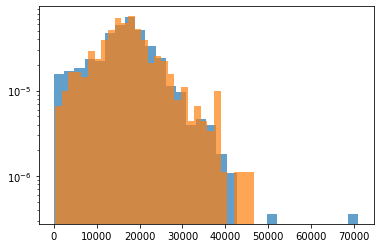

In [113]:
plt.hist(surf_plan_entries['mb_used'], log=True,density = True, alpha =0.7, bins=30)
plt.hist(ultimate_plan_entries['mb_used'],log=True, density = True, alpha=0.7, bins=30)
plt.show()

In [85]:
surf_plan_entries['mb_used'].describe()

count     1180.000000
mean     16654.659322
std       7723.226392
min         93.000000
25%      12411.750000
50%      16902.000000
75%      20949.750000
max      70997.000000
Name: mb_used, dtype: float64

In [86]:
ultimate_plan_entries['mb_used'].describe()

count      579.000000
mean     17276.848014
std       7694.289527
min        291.000000
25%      12725.500000
50%      16898.000000
75%      20907.000000
max      46638.000000
Name: mb_used, dtype: float64

In [87]:
surf_mb_variance = np.var(surf_plan_entries['mb_used'])

In [88]:
surf_mb_variance

59597676.55681988

In [89]:
ultimate_mb_variance = np.var(ultimate_plan_entries['mb_used'])

In [90]:
ultimate_mb_variance

59099842.460492596

Our preliminary conclusion was right. From the histogram we can clearly see that surf plan users tend to use more web traffic. The metrics we got:
- surf_plan : mean_mb_used = 16654.659322, variance of mb_used = 59597676.55681988, standard deviation of mb_used = 7723.226392
- ultimate_plan : mean_mb_used = 17276.848014, variance of mb_used = 59099842.460492596, standard deviation of mb_used = 7694.289527

###### Looking at messages 

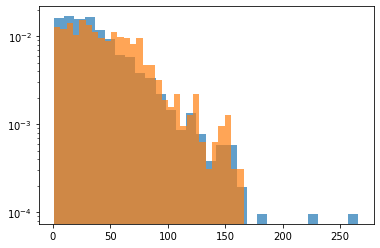

In [112]:
plt.hist(surf_plan_entries['messages'], log= True, density= True, alpha =0.7, bins=30)
plt.hist(ultimate_plan_entries['messages'], log= True, density= True, alpha =0.7, bins=30)
plt.show()

In [92]:
surf_plan_entries['messages'].describe()

count    1180.000000
mean       39.489831
std        32.314360
min         1.000000
25%        16.000000
50%        32.000000
75%        53.000000
max       266.000000
Name: messages, dtype: float64

In [93]:
ultimate_plan_entries['messages'].describe()

count    579.000000
mean      46.455959
std       32.930135
min        1.000000
25%       21.000000
50%       41.000000
75%       66.000000
max      166.000000
Name: messages, dtype: float64

In [94]:
surf_messages_variance = np.var(surf_plan_entries['messages'])
surf_messages_variance

1043.3329474288998

In [95]:
ultimate_messages_variance = np.var(ultimate_plan_entries['messages'])
ultimate_messages_variance

1082.5209446338606

From the histogram it looks like surf plan users send more messages, than ultimate plan users. The metrics we got:
- surf plan: mean_messages = 39.489831, variance of messages = 1043.3329474288998, standard deviation of messages = 32.314360
- ultimate plan: mean_messages = 46.455959, variance of messages = 1082.5209446338606, standard deviation of messages =32.930135 

###### Looking at minutes_n

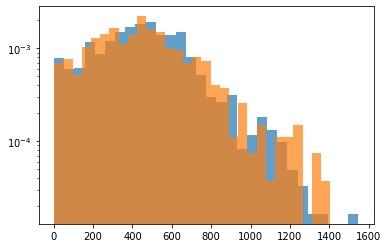

In [110]:
plt.hist(surf_plan_entries['minutes_n'],log= True, density= True, alpha =0.7, bins=30)
plt.hist(ultimate_plan_entries['minutes_n'], log= True, density= True, alpha =0.7, bins=30)
plt.show()

In [97]:
surf_plan_entries['minutes_n'].describe()

count    1180.000000
mean      457.833898
std       241.045295
min         2.000000
25%       299.750000
50%       452.000000
75%       603.250000
max      1548.000000
Name: minutes_n, dtype: float64

In [98]:
ultimate_plan_entries['minutes_n'].describe()

count     579.000000
mean      454.810017
std       256.041982
min         2.000000
25%       270.000000
50%       438.000000
75%       596.000000
max      1404.000000
Name: minutes_n, dtype: float64

In [99]:
surf_minutes_variance = np.var(surf_plan_entries['minutes_n'])
surf_minutes_variance

58053.59444412524

In [100]:
ultimate_minutes_variance = np.var(ultimate_plan_entries['minutes_n'])
ultimate_minutes_variance

65444.27133316032

From the histogram we see that surf plan users talk more thorugh the phone, than ultimate plan users. The metrics we got:
- surf plan: mean_messages = 457.833898, variance of messages = 58053.59444412524, standard deviation of messages = 241.045295
- ultimate plan: mean_messages = 454.810017, variance of messages = 65444.27133316032, standard deviation of messages =256.041982

Overall:
- We see that surf plan users tend to overpay much, but they use much more service than ultimate plan users
- Ultimate plan users have a small overpay, but bring larger profit to the company
- From the sentences above, we can conclude that surf plan is better for users, while ultimate plan is bring more profit to the Megaline

<div class="alert alert-success" role="alert">
Perfectly done! =)
</div>

# Step 4. Test the hypotheses

###### First hypothesis test

H0 : The average profit from users of Ultimate and Surf calling plans is the same.

HA: The average profit from users of Ultimate and Surf calling plans differs.

In [101]:
alpha = .05

#we'll test the mothly profit for each plan
test = st.ttest_ind(surf_plan_entries['monthly_profit'], ultimate_plan_entries['monthly_profit'] )

print('p-value:', test.pvalue)
if(test[1]<alpha):
    print('We reject the null hypothesis')
else:
    print('We do not reject the null hypothesis')


p-value: 6.313898978162505e-11
We reject the null hypothesis


the p value we got is substantially smaller then alpha, so we reject the null hypothesis. We conlude that the average profit from users of Ultimate and Surf calling plans differs 

###### Second hypothesis test

H0 : The average profit from users in NY-NJ area is not different from that of the users from other regions.

HA: The average profit from users in NY-NJ area is different from that of the users from other regions.

In [102]:
alpha= .05
#we'll test the mothly profit for each plan
ny_nj_area_stats = res.query("city == 'New York-Newark-Jersey City, NY-NJ-PA MSA' ")['monthly_profit']
other_area_stats = res.query("city != 'New York-Newark-Jersey City, NY-NJ-PA MSA' ")['monthly_profit']
                                                                                     
test = st.ttest_ind(ny_nj_area_stats, other_area_stats)

print('p-value:', test.pvalue)
if(test[1]<alpha):
    print('We reject the null hypothesis')
else:
    print('We do not reject the null hypothesis')


p-value: 0.007000477020567731
We reject the null hypothesis


Our p value is smaller than the alpha level, so we reject the null hypothesis. We conclude that: The average profit from users in NY-NJ area is different from that of the users from other regions.

# Step 5. Conclusion

We conducted a thorough analysis of the Megaline clients dataset. To get reliable conclusions, we counted an exceeding amount of the services that users used and counted overpay. Using overpay and baseline price we were able to get the overall monthly profit the company gets. After that we conducted a parameter analysis, and saw that surf plan users have a higher overpay, and a higher rate of using services but a lesser amount of money paid to the company. On the contrary, the ultimate plan users have a smaller overpay but bring a higher profit to the company. 

We also conducted a hypothesis testing and reject null hypotheses in both cases. We conluded that:
  - The average profit from users of Ultimate and Surf calling plans differs
  - The average profit from users in NY-NJ area is different from that of the users from other regions.

From the conclusions above, we'll advice Megaline to advertise the ultimate plan as it is more profittable to the company

<div class="alert alert-success" role="alert">
This is one of the best projects I have reviewed on this task. Every step is well-thought out and throughly explained, results are neat and beautifully presented. All in all, exemplary work!
</div>

<div class="alert alert-success" role="alert">
I'm accepting this project and wish you the best of luck in your future work!
</div>